# Lectura de datasets y preprocesado
**Autores:** José A. Troyano, Beatriz Pontes   &nbsp;&nbsp;&nbsp; **Última modificación:** 01/03/2022

--------------------------------------------------------------------------
## Contenido
1. <a href="#pandas"> Lectura y representación de datasets con Pandas  </a> <br>
    1.1. <a href="#series_dataframe"> Creación de objetos <code>Series</code> y <code>DataFrame</code>  </a> <br>
    1.2. <a href="#smart"> Acceso y _smart indexing_  </a> <br>
    1.3. <a href="#lectura_pandas"> Lectura de datasets  </a> <br>
    1.4. <a href="#combinacion_pandas"> Operaciones y combinación  </a> <br>
    1.5. <a href="#apply"> Métodos <code>apply</code> y <code>map</code>  </a> <br>
    1.6. <a href="#fechas"> Tratamiento de fechas  </a> <br>    
2. <a href="#normalizacion">Normalización <br>
    2.1. <a href="#min_max_z_score">Min-max y _Z-score_  </a> <br>
    2.2. <a href="#norm_sklearn">Normalización con _sklearn_ </a> <br>
3. <a href="#codificacion"> Codificación de atributos discretos </a> <br>
    3.1. <a href="#tipos_atributos">Tipos de atributos </a> <br>
    3.2. <a href="#label_encoding">Codificación _label encoding_</a> <br>
    3.3. <a href="#one_hot_encoding">Codificación _one hot encoding_</a> <br>
4. <a href="#nans"> Tratamiento de valores ausentes </a> <br>
    4.1. <a href="#eliminar">Eliminar filas con valores ausentes</a><br>
    4.2. <a href="#global">Rellenar con  valores globales </a><br>
    
-------------------------------------------------

## 1. Lectura y representación de datasets con Pandas <a name="pandas"> </a>

Trabajaremos con el dataset _bike_. Antes de empezar, echaremos un vistazo a los datos con un editor de textos planos, o con Excel:

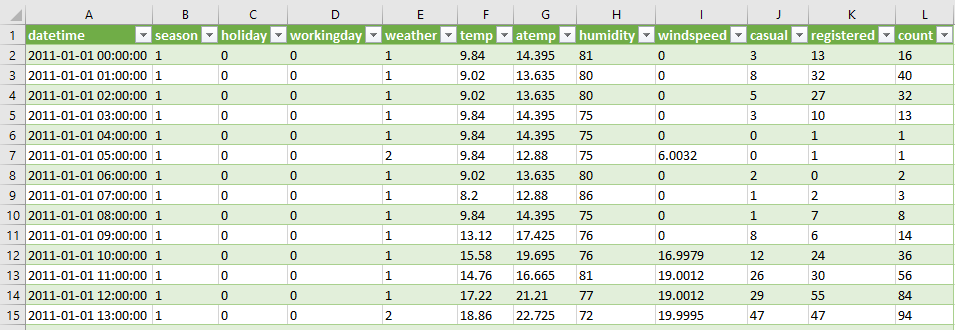

Pandas es una librería desarrollada sobre Numpy para la manipulación y análisis de datos. Proporciona, entre otras cosas, dos estructuras para representar datos: 
- <code>Series</code> para datos vectoriales
- <code>DataFrame</code> para datasets

Importaremos pandas y numpy de la siguiente forma:

In [1]:
import numpy as np
import pandas as pd

### 1.1. Creación de objetos <code>Series</code> y <code>DataFrame</code> <a name="series_dataframe"> </a>

In [2]:
# EJERCICIO: crear dos series con los números del 1 al 5
#    - numeros: con el índice por defecto
#    - numeros_ix_ch: usando como índices las vocales = ['a', 'e', 'i', 'o', 'u']
numeros = pd.Series([1, 2, 3, 4, 5])
numeros

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
numeros_ix_ch = pd.Series([1, 2, 3, 4, 5], ['a', 'e', 'i', 'o', 'u'])
numeros_ix_ch

a    1
e    2
i    3
o    4
u    5
dtype: int64

In [4]:
# EJERCICIO: crear dos dataframes de la siguiente matriz de números aleatorios 'np.random.rand(10,3)'
#    - df: sin especificar nombres de columnas
#    - df_col: usando como nombres de columnas ['C1', 'C2', 'C3']
df = pd.DataFrame(np.random.rand(10,3))
df

,0,1,2
0,0.742962,0.950454,0.573064
1,0.420352,0.451262,0.918679
2,0.382416,0.958354,0.555460
3,0.542000,0.624792,0.740369
4,0.501180,0.389275,0.485989
5,0.750386,0.015128,0.826037
6,0.627714,0.342640,0.804793
7,0.461452,0.250626,0.222925
8,0.263465,0.756816,0.775804
9,0.206344,0.562928,0.487764


In [5]:
df_col = pd.DataFrame(np.random.rand(10,3), columns=['C1', 'C2', 'C3'])
df_col

,C1,C2,C3
0,0.711523,0.915345,0.883623
1,0.090743,0.975248,0.877603
2,0.168729,0.452265,0.297411
3,0.625659,0.898448,0.840761
4,0.196996,0.009896,0.757741
5,0.705380,0.078541,0.756483
6,0.689634,0.816566,0.086669
7,0.029159,0.324708,0.399150
8,0.598344,0.495892,0.752114
9,0.375955,0.913530,0.744532


### 1.2. Acceso y _smart indexing_ <a name="smart"> </a>

In [6]:
# EJERCICIO: mostrar el resultado de las siguientes consultas sobre series
#    - elemento 0 de la serie 'numeros'
#    - serie con los elementos 1-3 de la serie 'numeros'
#    - elemento de la serie 'numeros_ix_ch' indexado con el carácter 'e'
#    - serie con los elementos de la serie 'numeros' que sean mayores que 3
numeros

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [7]:
numeros_ix_ch

a    1
e    2
i    3
o    4
u    5
dtype: int64

In [8]:
numeros[0]

1

In [9]:
numeros[1:4]

1    2
2    3
3    4
dtype: int64

In [10]:
numeros_ix_ch['e']

2

In [11]:
resultado = pd.Series([i for i in numeros if i > 3])
resultado

0    4
1    5
dtype: int64

In [12]:
# EJERCICIO: mostrar el resultado de las siguientes consultas sobre dataframes
#    - fila 3 del dataframe 'df'
#    - fila 3 del dataframe 'df_col'
#    - columna 1 de la fila 3 del dataframe 'df'
#    - columna 'C1' del dataframe df_col
df

,0,1,2
0,0.742962,0.950454,0.573064
1,0.420352,0.451262,0.918679
2,0.382416,0.958354,0.555460
3,0.542000,0.624792,0.740369
4,0.501180,0.389275,0.485989
5,0.750386,0.015128,0.826037
6,0.627714,0.342640,0.804793
7,0.461452,0.250626,0.222925
8,0.263465,0.756816,0.775804
9,0.206344,0.562928,0.487764


In [13]:
df_col

,C1,C2,C3
0,0.711523,0.915345,0.883623
1,0.090743,0.975248,0.877603
2,0.168729,0.452265,0.297411
3,0.625659,0.898448,0.840761
4,0.196996,0.009896,0.757741
5,0.705380,0.078541,0.756483
6,0.689634,0.816566,0.086669
7,0.029159,0.324708,0.399150
8,0.598344,0.495892,0.752114
9,0.375955,0.913530,0.744532


In [14]:
df.iloc[3]

0    0.542000
1    0.624792
2    0.740369
Name: 3, dtype: float64

In [15]:
df_col.iloc[3]

C1    0.625659
C2    0.898448
C3    0.840761
Name: 3, dtype: float64

In [16]:
df.iloc[3].get(1)

0.6247917759595379

In [17]:
df_col.get('C1')

0    0.711523
1    0.090743
2    0.168729
3    0.625659
4    0.196996
5    0.705380
6    0.689634
7    0.029159
8    0.598344
9    0.375955
Name: C1, dtype: float64

In [18]:
# EJERCICIO: mostrar el resultado de los siguientes consultas sobre dataframes
#    - dataframe compuesto por las columnas 'C1' y 'C3' del dataframe 'df_col'
#    - dataframe compuesto por las filas del dataframe 'df_col' cuyo valor de 'C2' sea mayor que 0.5
#    - dataframe compuesto por las columnas 'C1' y 'C3', con las filas cuyo valor de 'C2' sea mayor que 0.5
#    - dataframe con todas las columnas y con las filas en las que 'C2' sea mayor que 0.5 y 'C3' sea menor que 0.5
df_col

,C1,C2,C3
0,0.711523,0.915345,0.883623
1,0.090743,0.975248,0.877603
2,0.168729,0.452265,0.297411
3,0.625659,0.898448,0.840761
4,0.196996,0.009896,0.757741
5,0.705380,0.078541,0.756483
6,0.689634,0.816566,0.086669
7,0.029159,0.324708,0.399150
8,0.598344,0.495892,0.752114
9,0.375955,0.913530,0.744532


In [19]:
# dataframe compuesto por las columnas 'C1' y 'C3' del dataframe 'df_col'
df13 = pd.DataFrame(columns = [df_col.get('C1'), df_col.get('C3')])
df13

C1,0.711523,0.090743,0.168729,0.625659,0.196996,0.705380,0.689634,0.029159,0.598344,0.375955
C3,0.883623,0.877603,0.297411,0.840761,0.757741,0.756483,0.086669,0.399150,0.752114,0.744532


In [20]:
# dataframe compuesto por las filas del dataframe 'df_col' cuyo valor de 'C2' sea mayor que 0.5
df_col[df_col['C2'] > 0.5]

,C1,C2,C3
0,0.711523,0.915345,0.883623
1,0.090743,0.975248,0.877603
3,0.625659,0.898448,0.840761
6,0.689634,0.816566,0.086669
9,0.375955,0.913530,0.744532


In [21]:
# dataframe compuesto por las columnas 'C1' y 'C3', con las filas cuyo valor de 'C2' sea mayor que 0.5
df_col[df_col['C2'] > 0.5][['C1', 'C3']]

,C1,C3
0,0.711523,0.883623
1,0.090743,0.877603
3,0.625659,0.840761
6,0.689634,0.086669
9,0.375955,0.744532


In [22]:
# dataframe con todas las columnas y con las filas en las que 'C2' sea mayor que 0.5 y 'C3' sea menor que 0.5
df_col[(df_col['C2'] > 0.5) & (df_col['C3'] < 0.5)]

,C1,C2,C3
6,0.689634,0.816566,0.086669


### 1.3. Lectura de datasets <a name="lectura_pandas"> </a>

En este apartado trabajaremos con un dataset de datos de un servicio de alquiler de bicicletas, donde los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten. 

Los datos generados por estos sistemas los hacen atractivos para los investigadores, ya que se registra la duración del viaje, el lugar de salida, el lugar de llegada y el tiempo transcurrido. Estos datos pueden utilizarse para estudiar la movilidad en una ciudad.

Los datos que utilizaremos a continuación han sido obtenidos de Capital bikeshare (https://ride.capitalbikeshare.com/system-data), a través de kaggle: https://www.kaggle.com/c/bike-sharing-demand/overview/

Haremos uso del conjunto de entrenamiento proporcionado, que se compone de los primeros 19 días de cada mes, mientras que el conjunto de prueba es del 20 al final del mes.



In [23]:
# EJERCICIO: leer el fichero de datos './train-bike.csv' en un dataframe
BIKE = pd.read_csv('./train-bike.csv')
BIKE[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


El significado de las distintas variables de estudio es el siguiente:

datetime - fecha y hora<br>
estación - 1 = primavera, 2 = verano, 3 = otoño, 4 = invierno<br> 
festivo - si el día se considera festivo<br>
día laborable - si el día no es ni fin de semana ni festivo<br>
tiempo - 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2: Niebla + Nublado, Niebla + Nubes dispersas, Niebla + Pocas nubes, Niebla<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  4: Lluvia intensa + Paletas de hielo + Tormenta eléctrica + Niebla, Nieve + Niebla<br> 
temp - temperatura en Celsius<br>
atemp - sensación de temperatura en Celsius<br>
humedad - humedad relativa<br>
windspeed - velocidad del viento<br>
casual - número de alquileres iniciados por usuarios no registrados<br>
registrado - número de alquileres iniciados por usuarios registrados<br>
count - número de alquileres totales<br>



In [24]:
# EJERCICIO: probar los métodos de los dataframes para las siguientes operaciones:
#    - Mostrar información sobre las columnas
#    - Mostrar indicadores estadísticos sobre las columnas
#    - Mostrar los tipos de las columnas
#    - Obtener una matriz numpy con los valores de los datos
BIKE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [25]:
BIKE.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [26]:
BIKE.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [27]:
BIKE.values

array([['2011-01-01 00:00:00', 1, 0, ..., 3, 13, 16],
       ['2011-01-01 01:00:00', 1, 0, ..., 8, 32, 40],
       ['2011-01-01 02:00:00', 1, 0, ..., 5, 27, 32],
       ...,
       ['2012-12-19 21:00:00', 4, 0, ..., 4, 164, 168],
       ['2012-12-19 22:00:00', 4, 0, ..., 12, 117, 129],
       ['2012-12-19 23:00:00', 4, 0, ..., 4, 84, 88]], dtype=object)

In [28]:
# Adicional 
# - Shape (nº filas + columnas)
# - Columns (columnas y sus valores)
BIKE.shape

(10886, 12)

In [29]:
BIKE.columns
BIKE.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype=object)

### 1.4. Operaciones y combinación <a name="combinacion_pandas"> </a>

In [30]:
# EJERCICIO: realizar las siguientes consultas sobre el dataframe con los datos de bike
#    - contar cuántas ocurrencias de cada valor del atributo season hay en el dataset.
#    - dividir el rango de valores de temp en diez partes y calcular cuántos elementos hay en cada uno de esos segmentos. 
BIKE['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [31]:
# BIKE['temp'].value_counts()
pd.cut(BIKE['temp'], 10).value_counts()

(24.928, 28.946]    1901
(12.874, 16.892]    1891
(20.91, 24.928]     1753
(16.892, 20.91]     1587
(8.856, 12.874]     1440
(28.946, 32.964]    1194
(4.838, 8.856]       648
(32.964, 36.982]     355
(0.78, 4.838]         69
(36.982, 41.0]        48
Name: temp, dtype: int64

In [32]:
# EJERCICIO: realizar las siguientes consultas sobre el dataframe con los datos de bike
#    - crear un atributo temp_wind que se calcule mediante la diferencia entre temp y windspeed.
#    - normalizar (de 0 a 1) las columnas season y weather guardándolas en las columnas 'season_norm' y 'weather_norm'.
#    La normalización la llevaremos a cabo dividiendo cada elemento por el máximo de los valores de su columna
BIKE['temp_wind'] = BIKE['temp'] - BIKE['windspeed']
BIKE['temp_wind']

0         9.8400
1         9.0200
2         9.0200
3         9.8400
4         9.8400
          ...   
10881   -10.4227
10882    -0.2413
10883    -1.0613
10884     7.9368
10885     4.1219
Name: temp_wind, Length: 10886, dtype: float64

In [33]:
BIKE

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_wind
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,9.8400
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,9.0200
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,9.0200
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,9.8400
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,9.8400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,-10.4227
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,-0.2413
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,-1.0613
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,7.9368


In [34]:
# normalizar (de 0 a 1) las columnas season y weather guardándolas en las columnas 'season_norm' y 'weather_norm'

'''
ERROR - PENDIENTE DE ARREGLAR!
'''

BIKE['season_norm'] = BIKE['season'].value_counts(normalize=True)
BIKE['weather_norm'] = BIKE['weather'].value_counts(normalize=True)
BIKE

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_wind,season_norm,weather_norm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,9.8400,NaN,NaN
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,9.0200,0.246739,0.660665
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,9.0200,0.251056,0.260334
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,9.8400,0.251056,0.078909
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,9.8400,0.251148,0.000092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,-10.4227,NaN,NaN
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,-0.2413,NaN,NaN
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,-1.0613,NaN,NaN
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,7.9368,NaN,NaN


In [35]:
# EJERCICIO: crear un dataframe con los atributos weather y humidity, con los registros de los datasets train y test.
BIKE_TEST = pd.read_csv('./test-bike.csv')
BIKE_TEST.info()

BIKE_TT = pd.concat([BIKE[['weather', 'humidity']], BIKE_TEST[['weather', 'humidity']]])
BIKE_TT.info()
BIKE_TT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   weather   17379 non-null  int64
 1   humidity  17379 non-null  int64
dtypes: int64(2)
memory usage: 407.3 KB


,weather,humidity
0,1,81
1,1,80
2,1,80
3,1,75
4,1,75


### 1.5 Métodos <code>apply</code> y <code>map</code> <a name="apply"> </a>

In [36]:
# EJERCICIO: definir una función calcula_level que devuelva los siguientes valores
# a partir de una temperatura:
#      'T1' para temperaturas menores a 15
#      'T2' para temperaturas mayores o iguales que 15 y menores que 30
#      'T3' para temperaturas mayores o iguales que 30
def calcula_level(temp):
    if temp < 15:
        return 'T1'
    elif (temp >= 15 and temp < 30):
        return 'T2'
    else:
        return 'T3'

# crear un atributo 'temp_level' segmentando el atributo 'temp' usando la función calcula_level 
BIKE['temp_level'] = BIKE['temp'].apply(calcula_level)
BIKE.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_wind,season_norm,weather_norm,temp_level
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,9.84,NaN,NaN,T1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,9.02,0.246739,0.660665,T1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,9.02,0.251056,0.260334,T1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,9.84,0.251056,0.078909,T1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,9.84,0.251148,0.000092,T1


In [37]:
# EJERCICIO: crear el atributo temp_code a partir del atributo numérico temp_level que toma los valores 1, 2 y 3 (usando map)
# Es posible porque existe un orden implícto
BIKE['temp_code']= BIKE['temp_level'].map({'T1':1, 'T2':2, 'T3':3})
BIKE['temp_code'].value_counts()

2    6249
1    3393
3    1244
Name: temp_code, dtype: int64

### 1.6. Tratamiento de fechas <a name="fechas"> </a>

In [38]:
# Es un string
BIKE.iloc[0,0]

'2011-01-01 00:00:00'

In [39]:
# EJERCICIO: volver a leer el dataset train analizando los datos tipo fecha y generar dos nuevas columnas:
#    - dia: con el día de la fecha
#    - mes: con el mes de la fecha
BIKE_F = pd.read_csv('./test-bike.csv', parse_dates=['datetime'])
BIKE_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [40]:
BIKE_F.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [41]:
BIKE_F['dia'] = BIKE_F['datetime'].dt.day
BIKE_F['mes'] = BIKE_F['datetime'].dt.month
BIKE_F.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dia,mes
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1


## 2. Normalización <a name="normalizacion"> </a>

### 2.1. Min-max y _Z-score_ <a name="min_max_z_score"> </a>
Algunos algoritmos de aprendizaje necesitan que los distintos atributos estén en un rango de valores similar (<code>SVM</code> es uno de ellos. Probaremos dos técnicas simples de normalización de datos: 
- Normalización _min-max_: restar el mínimo y dividir por la diferencia entre máximo y mínimo (produce valores entre 0 y 1)
- Normalización _Z-score_: restar la media y dividir por la desviación estándar (puede producir valores negativos)


In [42]:
# EJERCICIO: normalizar los valores de 'temp' entre [0,1] con la técnica _min-max_ y guardarlos en la columna 'temp_mm'
# Media: mean() Desv. standar: std()
# Min: min() Max: max()

valor_min = BIKE_F['temp'].min()
valor_max = BIKE_F['temp'].max()
media = BIKE_F['temp'].mean()
desviacion = BIKE_F['temp'].std()

diff = BIKE_F['temp'].max() - BIKE_F['temp'].min()
BIKE_F['temp_mm'] = (BIKE_F['temp'] - BIKE_F['temp'].min()) / diff
BIKE_F.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dia,mes,temp_mm
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,1,0.25
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,0.25
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,0.25
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,0.25
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,0.25


In [43]:
print(valor_min)
print(valor_max)
print(media)
print(desviacion)
print(diff)

0.82
40.18
20.620606807330972
8.059583026412835
39.36


In [44]:
# EJERCICIO: 
#    - Normalizar los valores de 'registered' con la técnica z-score y guardarlos en la columna 'registered_zs'
#    - Comparar la media y la desviación estándar de ambas columnas
BIKE['registered_zs'] = (BIKE['registered'] - BIKE['registered'].mean()) / BIKE['registered'].std()
BIKE.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_wind,season_norm,weather_norm,temp_level,temp_code,registered_zs
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,9.84,NaN,NaN,T1,1,-0.943810
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,9.02,0.246739,0.660665,T1,1,-0.818015
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,9.02,0.251056,0.260334,T1,1,-0.851119
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,9.84,0.251056,0.078909,T1,1,-0.963673
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,9.84,0.251148,0.000092,T1,1,-1.023260


### 2.2. Normalización con <code>sklearn</code> <a name="norm_sklearn"> </a>

Sklearn proporciona algunos métodos de normalización, probaremos también cómo usar algunos de ellos:
- <code>MaxAbsScaler</code>: desplaza y escala para que el máximo valor absoluto sea 1. Los valores resultantes quedan, por tanto, dentro del rango [-1,1]
- <code>MinMaxScaler</code>: resta el mínimo y divide por la amplitud (máximo-mínimo)
- <code>StandardScaler</code>: resta la media y divide por la desviación típica (es el _Z-score_)

Será la primera vez que usemos un estimador de Sklearn. Antes de empezar tendremos que buscar la respuesta a estas preguntas:
- ¿Qué es <code>fit</code>?
- ¿Qué es <code>transform</code>?
- ¿Qué es <code>fit_transform</code>?

In [59]:
# EJERCICIO: importar desde sklearn los elementos que necesitemos
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler

In [62]:
# EJERCICIO: aplicar las transformacines necesarias para crear las siguientes columnas
#    - registered_maxabs: MaxAbsScaler sobre la columna 'registered'
#    - registered_minmax: MinMaxScaler sobre la columna 'registered'
#    - registered_sca: StandardScaler sobre la columna 'registered'

'''
Fit ajusta los datos pero NO devuelve nada, a diferencia de transform.
'''

#    - registered_maxabs: MaxAbsScaler sobre la columna 'registered'
# Objeto que normaliza los datos que reciba; entrada: una matriz
normalizador = MaxAbsScaler()
normalizador.fit(BIKE[['registered']])

# La transformación genera una salida que será una nueva columna:
BIKE['registered_maxabs'] = normalizador.transform(BIKE[['registered']])
BIKE.head()

# - registered_minmax: MinMaxScaler sobre la columna 'registered'
# Más rápido invocando al método combinado que hace fit y transform a la vez:
BIKE['registered_minmax'] = MinMaxScaler().fit_transform(BIKE[['registered']])
BIKE.head()

# - registered_sca: StandardScaler sobre la columna 'registered'
BIKE['registered_standard'] = StandardScaler().fit_transform(BIKE[['registered']])
BIKE.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,temp_wind,season_norm,weather_norm,temp_level,temp_code,registered_zs,registered_maxabs,registered_minmax,registered_standard
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,16,9.84,NaN,NaN,T1,1,-0.943810,0.014673,0.014673,-0.943854
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,40,9.02,0.246739,0.660665,T1,1,-0.818015,0.036117,0.036117,-0.818052
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,32,9.02,0.251056,0.260334,T1,1,-0.851119,0.030474,0.030474,-0.851158
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,13,9.84,0.251056,0.078909,T1,1,-0.963673,0.011287,0.011287,-0.963717
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,9.84,0.251148,0.000092,T1,1,-1.023260,0.001129,0.001129,-1.023307


## 3. Codificación de atributos discretos <a name="codificacion"> </a>

En esta sección veremos cómo codificar atributos discretos mediante valores numéricos. Esto es necesario porque muchos de los algoritmos de aprendizaje solo soportan atributos numéricos. En concreto, los algoritmos implemenatdos en Sklearn solo pueden manejar atributos numéricos.

In [64]:
# Cargamos los datos de 'weather.csv' en el dataframe 'DATOS'
DATOS = pd.read_csv('./weather.csv')
DATOS.info()
DATOS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     int64 
 2   humidity     14 non-null     int64 
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes


,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


### 3.1. Tipos de atributos <a name="tipos_atributos"> </a>

In [68]:
# EJERCICIO: crear las matrices 'DATOS_discretos' y 'DATOS_numericos' con los atributos discretos y numéricos, respectivamente, de 'DATOS'
# Dos formas de crear las matrices:
DATOS_discretos = DATOS[['outlook', 'windy', 'play']]
DATOS_discretos.head()

,outlook,windy,play
0,sunny,False,no
1,sunny,True,no
2,overcast,False,yes
3,rainy,False,yes
4,rainy,False,yes


In [69]:
DATOS_numericos = DATOS.select_dtypes(include=['int64'])
DATOS_numericos.head()

,temperature,humidity
0,85,85
1,80,90
2,83,86
3,70,96
4,68,80


En general, nos podemos encontrar con tres tipos de atributos discretos:
- **Binarios (o categóricos con dos _levels_)** : como el atributo <code>play</code> del ejemplo
- **Categóricos**: como el atributo <code>outlook</code> del ejemplo
- **Ordinales**: sería un atributo categórico en el que, además, hay una relación de orden. Por ejemplo sería un atributo <code>nivel_humedad</code> con valores <code>['bajo', 'medio', 'alto']</code>.

Los atributos ordinales se pueden codificar mediante un único atributo numérico, ya que la relación de orden se mantiene en la representación numérica. A este tipo de codificación se le denomina _label encoding_.

Los categóricos, sin embargo, no se pueden codificar con un número, ya que el algoritmo de aprendizaje asumiría una relación de orden que no existe. En este caso se debe utilizar una codificación en varias columnas, el denominado _one-hot encoding_.

Los binarios son realmente categóricos, pero podemos intentar codificarlos con un único atributo numérico que tome los valores $0$ y $1$.

In [73]:
# EJERCICIO: mostrar el número de 'levels' para cada atributo discreto
# Crear un DataFrame con las columnas 'Número' y 'Niveles'
# Añadir una fila para cada atributo discreto con el número de posibles valores y sus valores
niveles = pd.DataFrame(columns = ['Números', 'Niveles'])

for atributo in DATOS_discretos.columns.values:
    valores = list(DATOS_discretos[atributo].value_counts().keys())
    niveles.loc[atributo] = (len(valores), valores)
    
niveles

# DATOS_discretos.columns.values
# DATOS_discretos['outlook'].value_counts()

,Números,Niveles
outlook,3,"[sunny, rainy, overcast]"
windy,2,"[False, True]"
play,2,"[yes, no]"


### 3.2. Codificación _label encoding_<a name="label_encoding"> </a>

In [75]:
# EJERCICIO: codificar mediante label encoding el atributo 'play' en una nueva columna 'play_label', usando map
DATOS['play_label'] = DATOS['play'].map({'yes' : 1, 'no' : 0})
DATOS.head()

,outlook,temperature,humidity,windy,play,play_label
0,sunny,85,85,False,no,0
1,sunny,80,90,True,no,0
2,overcast,83,86,False,yes,1
3,rainy,70,96,False,yes,1
4,rainy,68,80,False,yes,1


### 3.3. Codificación _one hot encoding_ <a name="one_hot_encoding"> </a>

In [76]:
# EJERCICIO: codificar mediante one hot encoding el atributo categórico 'outlook'
#    - Pandas proporciona un método para hacerlo
DATOS = pd.get_dummies(DATOS, columns = ['outlook'])
DATOS.head()

,temperature,humidity,windy,play,play_label,outlook_overcast,outlook_rainy,outlook_sunny
0,85,85,False,no,0,0,0,1
1,80,90,True,no,0,0,0,1
2,83,86,False,yes,1,1,0,0
3,70,96,False,yes,1,0,1,0
4,68,80,False,yes,1,0,1,0


## 4. Tratamiento de valores ausentes <a name="nans"> </a>

Es común encontrarse con datasets en los que faltan valores en algunas columnas. Antes de despreciar la fila correspondiente, puede ser una buena estrategia rellenar esos huecos con valores razonables. Veremos algunas técnicas simples para hacer esto.

In [77]:
# Cargamos los datos de 'titanic.csv' en el dataframe 'TITANIC'
DATOS = pd.read_csv('./titanic.csv')
DATOS.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [78]:
# EJERCICIO: mostrar aquellas filas que contengan algún valor ausente
DATOS.isnull()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,False


In [79]:
# Otra forma: vemos que columnas contienen valores nulos:
DATOS.isnull().any(axis=0)

pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare         True
cabin        True
embarked     True
survived    False
dtype: bool

In [80]:
# Si quiero verlo por filas:
DATOS.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1304     True
1305     True
1306     True
1307     True
1308     True
Length: 1309, dtype: bool

In [81]:
# Si quiero verlo como dataframe:
DATOS[DATOS.isnull().any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


### 4.1. Eliminar filas con valores ausentes <a name="eliminar"> </a>

Esta opción no es la más recomendable, sobretodo cuando se tienen conjuntos de datos pequeños o con un alto porcentaje de valores perdidos

In [85]:
# EJERCICIO: Crear un dataframe TITANIC2 donde se hayan eliminado todas las filas con valores ausentes
DATOS2 = DATOS.dropna()
print(DATOS2.shape)
DATOS2.head()

(270, 11)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [87]:
# EJERCICIO: Crear un dataframe TITANIC3 a partir del original donde:
# - Se elimine la columna cabin (es la que más NaN tiene)
# - Se eliminen aquellas filas con valores ausentes (una vez eliminada cabin)
DATOS3 = DATOS.drop(['cabin'], axis=1)
DATOS3.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


In [88]:
DATOS3.dropna(inplace=True)
DATOS3.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


### 4.2. Rellenar con  valores globales <a name="global"> </a>

La técnica más simple para calcular esos valores es apoyarse en las funciones media y moda. En concreto, dependiendo del tipo de atributo para el que falten valores:
- **Numérico**: media del resto de valores de la columna
- **Discreto**: valor más frecuente (moda) del resto de los valores de la columna 

In [91]:
# EJERCICIO: construir las siguientes columnas en la que se sustituyen los valores NaN de la forma en que se indica:
#    - 'age_fill' sustituyendo los valores NaN de 'age' con la media de la columna
#    - 'fare_fill' sustituyendo los valores NaN de 'fare' con la media de la columna
#    - 'cabin_fill' sustituyendo los valores NaN de 'cabin' con el valor más frecuente de la columna (moda)
#    - 'embarked_fill' sustituyendo los valores NaN de 'embarked' con el valor más frecuente de la columna (moda)

# Para poder usar la moda:
from statistics import mode

DATOS3['age_fill'] = DATOS3['age'].fillna(DATOS3['age'].mean())
DATOS3['fare_fill'] = DATOS3['fare'].fillna(DATOS3['fare'].mean())
DATOS3.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,age_fill,fare_fill
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,29.0000,211.3375
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0.9167,151.5500
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,2.0000,151.5500
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,30.0000,151.5500
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,25.0000,151.5500


In [95]:
# DATOS3['cabin_fill'] = DATOS2['cabin'].fillna(DATOS3['cabin'].mode()[0])
DATOS3['embarked_fill'] = DATOS2['embarked'].fillna(DATOS3['embarked'].mode()[0])
DATOS3.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,age_fill,fare_fill,embarked_fill
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,29.0000,211.3375,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0.9167,151.5500,S
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,2.0000,151.5500,S
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,30.0000,151.5500,S
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,25.0000,151.5500,S


In [96]:
# EJERCICIO: Crear un DataFrame TITANIC4 a partir del anterior borrando las columnas con datos ausentes
DATOS3.dropna(axis=1, inplace=True)

In [97]:
DATOS3.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,age_fill,fare_fill
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,29.0000,211.3375
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0.9167,151.5500
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,2.0000,151.5500
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,30.0000,151.5500
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,25.0000,151.5500


In [ ]:
# FIN